In [20]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

scrape_questions_and_answers_df =  pl.read_parquet('../data/all_questions_and_answer.parquet')

## Data Analysis

We scraped 9941 questions and answers from Avvo.

In [13]:
scrape_questions_and_answers_df.group_by('number').len().shape[0]

9941

Number of valid scraped questions

In [19]:
scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]


3074

Number of invalid scraped questions

In [18]:
scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

3074

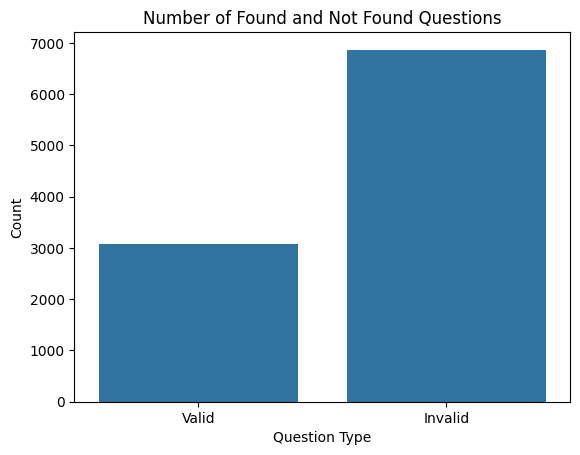

In [23]:
found_count = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]
not_found_count = scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

# Create a DataFrame with the counts
data = pl.DataFrame({
    'Question Type': ['Valid', 'Invalid'],
    'Count': [found_count, not_found_count]
})

# Create the bar plot
sns.barplot(x='Question Type', y='Count', data=data)
plt.title('Number of Found and Not Found Questions')
plt.show()

<Axes: xlabel='posted_times', ylabel='len'>

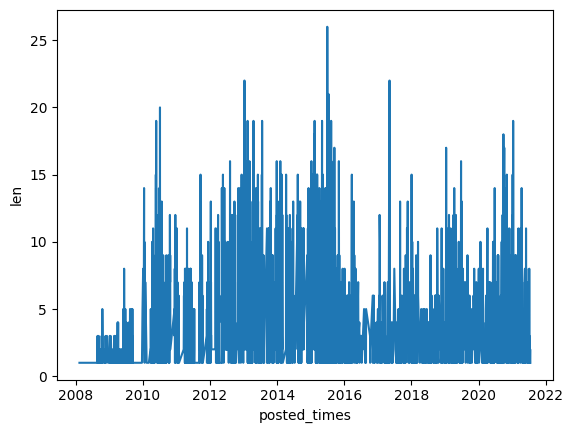

In [31]:
time_line_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('posted_times').len().sort('posted_times')

sns.lineplot(time_line_df, x='posted_times', y='len')